In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# A. Mendapatkan Informasi Dasar Data
    1. load data
    2. load data menjadi dataframe
    3. Cek dataframe
        a. Shape
        b. Head
        c. Tail
        d. Info
        e. Duplikasi (1)
        f. Duplikasi (2)

In [2]:
# 1. load data
train = 'data/train.csv'
test = 'data/test.csv'
desc = 'data/data_description.txt'

In [3]:
# 2. load data as dataframe
df = pd.read_csv(train)

In [4]:
# 3. checking df
# a. shape
df.shape
print(f"Jumlah baris {df.shape[0]}")
print(f"Jumlah kolom {df.shape[1]}")

Jumlah baris 1460
Jumlah kolom 81


In [5]:
# b. head
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
# c. tail
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,1

In [7]:
# d. info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# e. cek duplikasi (1)
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [9]:
# e. cek duplikasi (2)
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# B. Identifikasi Missing Value
    1. Menampilkan Missing Value
        a. Cek
    2. Membuat Fungsi Pengecekan Missing Values


In [10]:
# 1. Menampilkan Jumlah Record Missing Value di sebuah kolom
# a. Cek Missing
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
# kemudian di re-index
df.isna().sum().reset_index()

,index,0
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


In [12]:
# 2. Membuat fungsi missing untuk mensortir missing values sebuah kolom agar mudah dibaca

def cek_missing(df):
    sum_nan = df.isna().sum().reset_index()
    # rename nama kolom
    sum_nan.columns = ['nama_Kolom', 'jumlah_Missing']
    # membuat kolom persentase
    sum_nan["persentase"] = sum_nan.jumlah_Missing/len(df)
    return sum_nan.sort_values("persentase", ascending = False)
missing = cek_missing(df)

In [13]:
# Eksekusi fungsi cek_missing dan melihat hasilnya
missing

,nama_Kolom,jumlah_Missing,persentase
72,PoolQC,1453,0.995205
74,MiscFeature,1406,0.963014
6,Alley,1369,0.937671
73,Fence,1179,0.807534
57,FireplaceQu,690,0.472603
...,...,...,...
27,ExterQual,0,0.000000
24,Exterior2nd,0,0.000000
23,Exterior1st,0,0.000000
22,RoofMatl,0,0.000000


# C. Fixing Null Values
        1. Menyeleksi Missing Value dengan persentase kurang dari 70%
        2. Mendeskripsikan dataset ( mean, median, modus dsb)

In [14]:
# 1. Menyeleksi Missing Value dengan persentase kurang dari 70%
miss = missing[missing.persentase < 0.7]
miss


,nama_Kolom,jumlah_Missing,persentase
57,FireplaceQu,690,0.472603
3,LotFrontage,259,0.177397
59,GarageYrBlt,81,0.055479
64,GarageCond,81,0.055479
58,GarageType,81,0.055479
...,...,...,...
27,ExterQual,0,0.000000
24,Exterior2nd,0,0.000000
23,Exterior1st,0,0.000000
22,RoofMatl,0,0.000000


In [15]:
# Mencari kolom yang lebih dari 0
to_fix_col = miss[miss.persentase > 0 ].nama_Kolom.tolist()
to_fix_col

['FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [16]:
# 2. Drop kolom
df2 = df.drop(missing[missing.persentase > 0.7].nama_Kolom.tolist(), 1)
to_fix = df2[df2[to_fix_col].describe().columns.tolist()]
to_fix.skew()

LotFrontage    2.163569
GarageYrBlt   -0.649415
MasVnrArea     2.669084
dtype: float64

In [17]:
# 2. Mendeskripsikan dataset ( mean, median, modus dsb)
to_fix.describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


# D. Memisahkan Numerik dan Kategori
    1. Set Index
    2. Mengumpulkan record numerik
    3. Mengumpulkan record kategorikal
    4. Dataframe Numerik
    5. Dataframe Kategorikal

In [18]:
# 1. Set Index
df2 = df2.set_index('Id')

In [19]:
# 2. Mengumpulkan kolom berisi record numerik
col_numeric = df2.describe().columns.tolist()

In [20]:
# 3. Mengumpulkan kolom berisi record kategori
col_categoric = df2.describe(include="object").columns.tolist()

In [21]:
# 4. Membuat dataframe numerik
df2_numeric = df2[col_numeric]
df2_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500


In [22]:
# 5. Membuat dataframe kategorikal
df2_categoric = df2[col_categoric]
df2_categoric

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


# E. Identifikasi
    1. Outliers
    2. Skewness

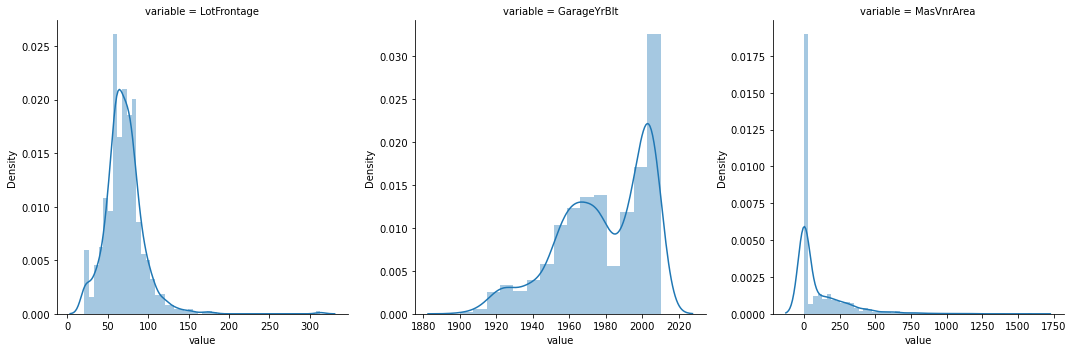

In [23]:
# Cek distribusi
# function visualisasi facetgrid
import warnings


def viz(df, types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False, size=5)
    g = g.map(types, "value")
    plt.show()
    return (g)


warnings.filterwarnings('ignore')
# LotFrontage with median , GarageYrBlt mean , and MasVnrArea with median
viz(to_fix, sns.distplot)


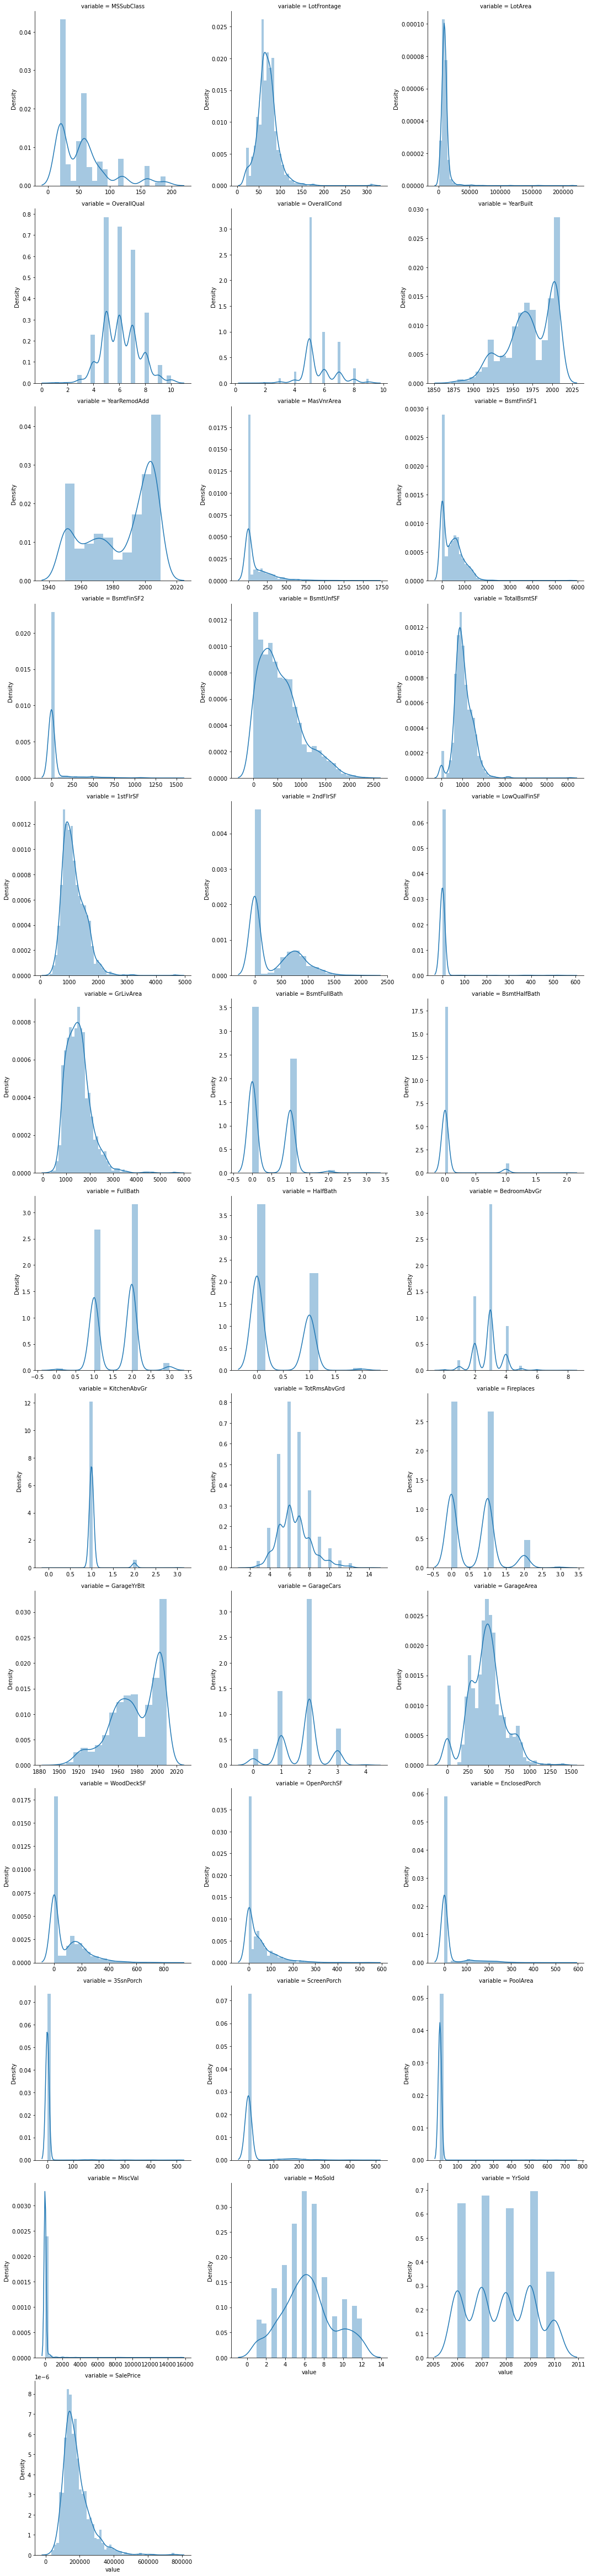

In [24]:
viz(df2_numeric, sns.distplot)


In [25]:
df2_numeric['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [26]:
skew_report = df2_numeric.skew().reset_index()
skew_report.columns = ['columns', 'skew_score']
skew_report.sort_values('skew_score', ascending=False)

,columns,skew_score
33,MiscVal,24.476794
32,PoolArea,14.828374
2,LotArea,12.207688
30,3SsnPorch,10.304342
14,LowQualFinSF,9.011341
21,KitchenAbvGr,4.488397
9,BsmtFinSF2,4.255261
31,ScreenPorch,4.122214
17,BsmtHalfBath,4.103403
29,EnclosedPorch,3.089872


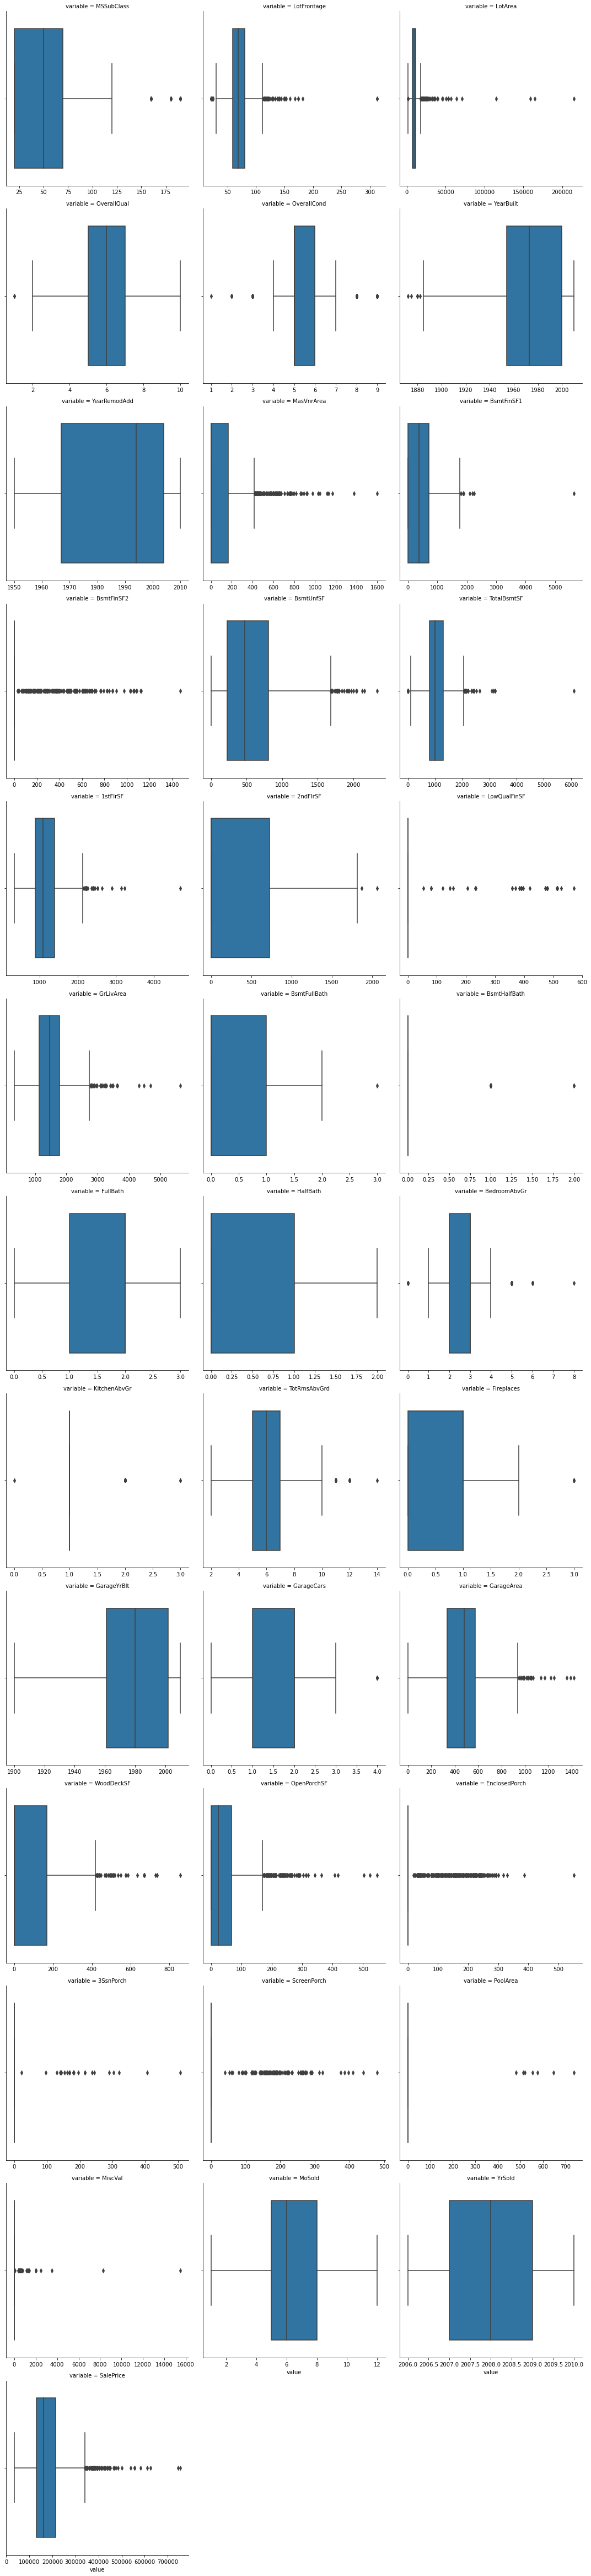

In [27]:
# outliers plots
viz(df2_numeric, sns.boxplot)


In [28]:
# outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [29]:
# mencari outliers details
for i in df2_numeric:
  print(i,'\n', display(outliers(df['WoodDeckSF'])))

,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MSSubClass 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LotFrontage 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LotArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OverallQual 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OverallCond 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YearBuilt 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YearRemodAdd 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MasVnrArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFinSF1 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFinSF2 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtUnfSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


TotalBsmtSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


1stFlrSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


2ndFlrSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


LowQualFinSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GrLivArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtFullBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BsmtHalfBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


FullBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


HalfBath 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


BedroomAbvGr 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


KitchenAbvGr 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


TotRmsAbvGrd 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


Fireplaces 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageYrBlt 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageCars 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


GarageArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


WoodDeckSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


OpenPorchSF 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


EnclosedPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


3SsnPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


ScreenPorch 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


PoolArea 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MiscVal 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


MoSold 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


YrSold 
 None


,sub,values
0,IQR,168.000000
1,Upper Bound,420.000000
2,Lower Bound,-252.000000
3,Sum outliers,32.000000
4,percentage outliers,2.191781


SalePrice 
 None


# F. Korelasi Antar Variabel
    1. Heatmap
    2. Matrix Korelasi variabel 'SalePrice'

<AxesSubplot:>

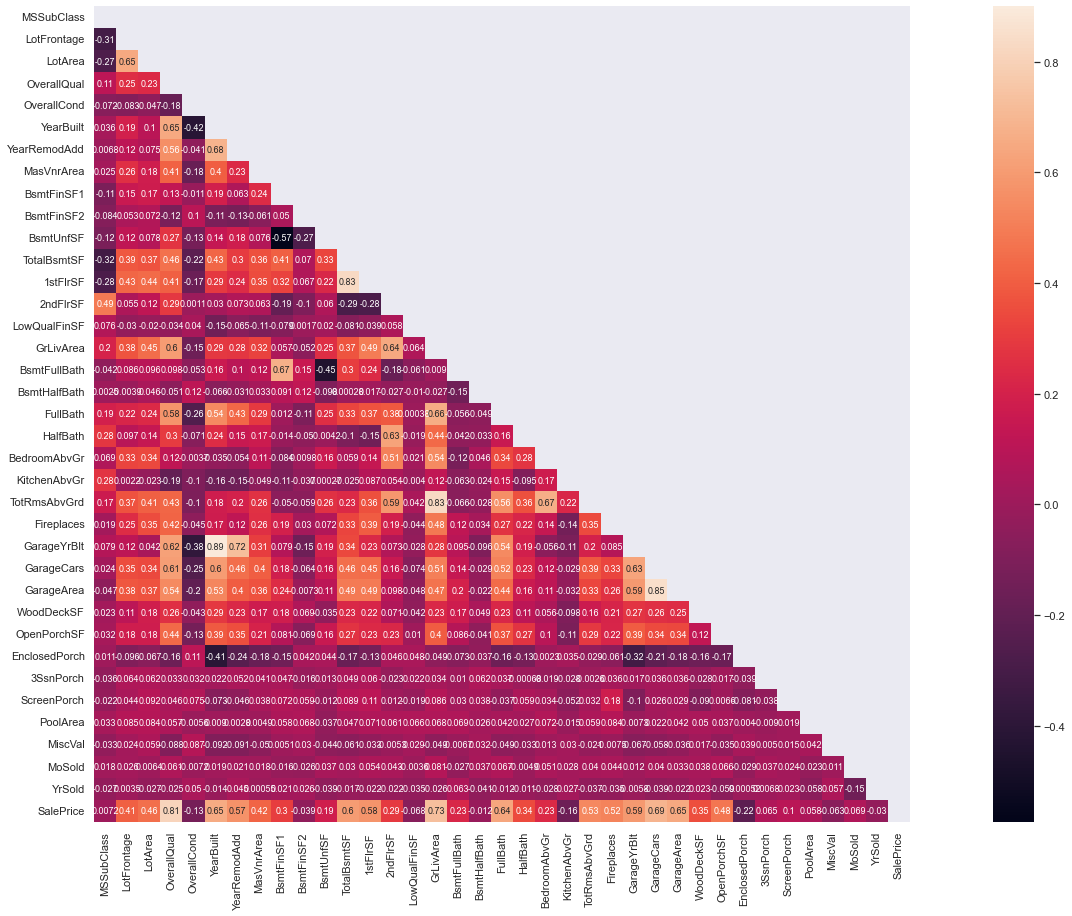

In [43]:
# 1. Heatmap
korelasi_matrix = df2.corr(method='spearman')
f, ax = plt.subplots(figsize=(30,15))
sns.heatmap(korelasi_matrix, vmax=.9, mask = np.triu(np.ones_like(korelasi_matrix)), annot=True, annot_kws={'size' : 9}, square=True)

# G. Multi Kolinearitas

- Tujuan

    Menguji dan mengetahui apakah dalam suatu model regresi ditemukan adanya korelasi yang tinggi atau sempurna antar variabel independen. Pengujian ini dapat diketahui dengan melihat nilai toleransi dan nilai variance inflation factor (VIF). Pengujian dilakukan dengan melihat nilai VIF atau variance inflation factors.

- Standard VIF (Ghozali 2016)

  1. Jika nilai VIF < 10 atau nilai Tolerance > 0,01, maka dinyatakan tidak terjadi multikolinearitas.

  2. Jika nilai VIF > 10 atau nilai Tolerance < 0,01, maka dinyatakan terjadi multikolinearitas.
    
  3. Jika koefisien korelasi masing-masing variabel bebas > 0,8 maka terjadi multikolinearitas. Tetapi jika koefisien korelasi masing-masing variabel bebas < 0,8 maka tidak terjadi multikolinearitas.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def hitung_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(
        X.values, i) for i in range(X.shape[1])]
    return(vif)


In [ ]:
# Encode kategorikal untuk melihat multikolinearitas
for i in df2_categoric:
    df2_categoric[i] = df2_categoric[i].astype('category').cat.codes


In [ ]:
# Menggabungkan numerik dan kategorikal
df2_categoric = df2_categoric.reset_index()
df2_numeric = df2_numeric.reset_index()
df3_merged = pd.merge(df2_numeric, df2_categoric, how='inner', on='Id')


In [ ]:
X = df3_merged.drop('SalePrice', 1)
vif = hitung_vif(X)
vif = vif.sort_values('VIF', ascending=False)
vif['VIF'] = round(vif.VIF)
vif[vif.VIF < 10]
